In [2]:
import zipfile as zp
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
filepath= "GTSRB.zip"
zp.ZipFile(filepath).extractall("GTSRB")

In [4]:
trainpath= os.path.join("GTSRB", "Train")
testpath= os.path.join("GTSRB", "Test")

In [5]:
trainCSV_path= os.path.join("GTSRB", "Train.csv")
testCSV_path= os.path.join("GTSRB", "Test.csv")

In [6]:
traincsv = pd.read_csv(trainCSV_path)
traincsv.shape

(39209, 8)

In [7]:
IMG_HEIGHT, IMG_WIDTH = 48, 48
BATCH_SIZE = 32
num_classes = 43

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2  # Split training into train/val
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join("GTSRB", "Train"),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_generator = train_datagen.flow_from_directory(
    directory=os.path.join("GTSRB", "Train"),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [25]:
import json

class_indices = train_generator.class_indices  # e.g., {'0': 0, '1': 1, ..., '42': 42}

with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



c:\Users\snski\OneDrive\Desktop\realtime\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)


c:\Users\snski\OneDrive\Desktop\realtime\.conda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 458s 465ms/step - accuracy: 0.2549 - loss: 2.6962 - val_accuracy: 0.5628 - val_loss: 1.4000
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6580 - loss: 1.0466 - val_accuracy: 0.7828 - val_loss: 0.7093
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8242 - loss: 0.5350 - val_accuracy: 0.8646 - val_loss: 0.4551
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.8839 - loss: 0.3593 - val_accuracy: 0.8986 - val_loss: 0.3591
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9122 - loss: 0.2687 - val_accuracy: 0.8985 - val_loss: 0.3532
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9333 - loss: 0.2153 - val_accuracy: 0.9371 - val_loss: 0.2374
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.9409 - loss: 0.1896 - val_accuracy: 0.9263 - val_loss: 0.2535
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.9480 - loss: 0.1621 

In [11]:
import pickle

with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)


In [12]:
testcsv = pd.read_csv(testCSV_path)
testcsv.shape
testcsv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [13]:
test_images = []

for img_name in testcsv['Path']:
  img_filename = os.path.basename(img_name)
  img_path = os.path.join("GTSRB", "Test", img_filename)
  img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
  img = img_to_array(img) / 255.0
  test_images.append(img)

In [14]:
X_test = np.array(test_images)
y_test = testcsv['ClassId'].values

In [15]:
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

In [16]:
class_indices = train_generator.class_indices

# Fixing label mapping: Ensure it is numeric and sorted
idx_to_label = {v: int(k) for k, v in sorted(class_indices.items(), key=lambda item: int(item[0]))}
label_names = [str(idx_to_label[i]) for i in range(len(idx_to_label))]


In [17]:
import json

with open("label_map.json", "w") as f:
    json.dump(idx_to_label, f)


In [18]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_pred_labels = np.array([idx_to_label[i] for i in y_pred])
y_pred_labels

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


array([16,  1, 38, ...,  5,  7, 10])

In [19]:
# Accuracy
print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, y_pred_labels) * 100))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

Accuracy on test set: 96.40%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      0.99      0.99       720
           2       0.95      0.98      0.97       750
           3       0.99      0.88      0.93       450
           4       0.99      0.98      0.99       660
           5       0.88      0.94      0.91       630
           6       0.99      0.90      0.94       150
           7       0.99      0.91      0.95       450
           8       0.93      0.96      0.94       450
           9       0.99      1.00      1.00       480
          10       1.00      0.99      0.99       660
          11       0.91      1.00      0.95       420
          12       1.00      0.98      0.99       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.95      1.00      0.97       210
          16       1.00    

In [20]:
model.save("GTSRBmodel.keras")

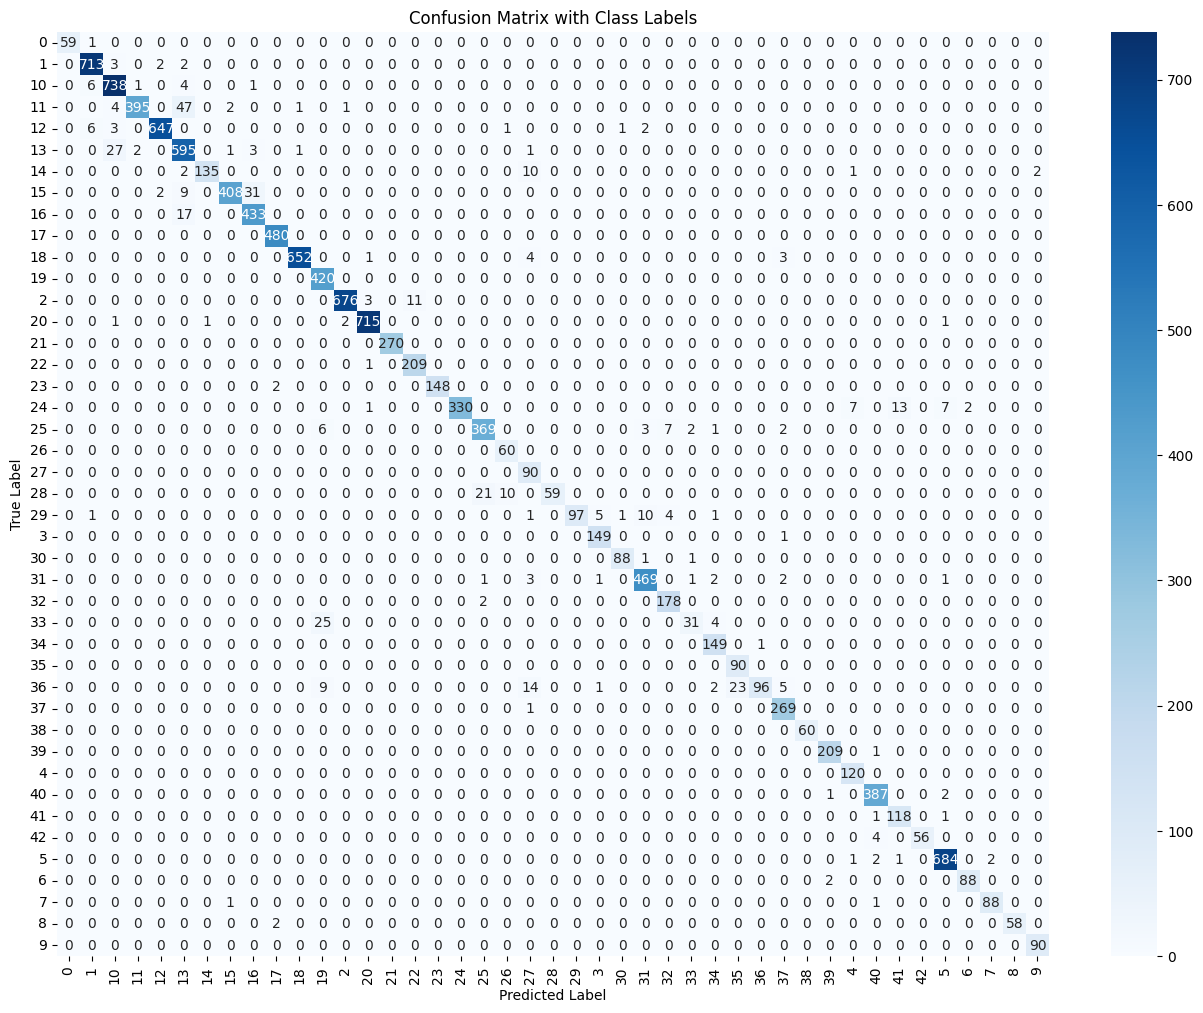

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
class_names = label_names

plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix with Class Labels")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

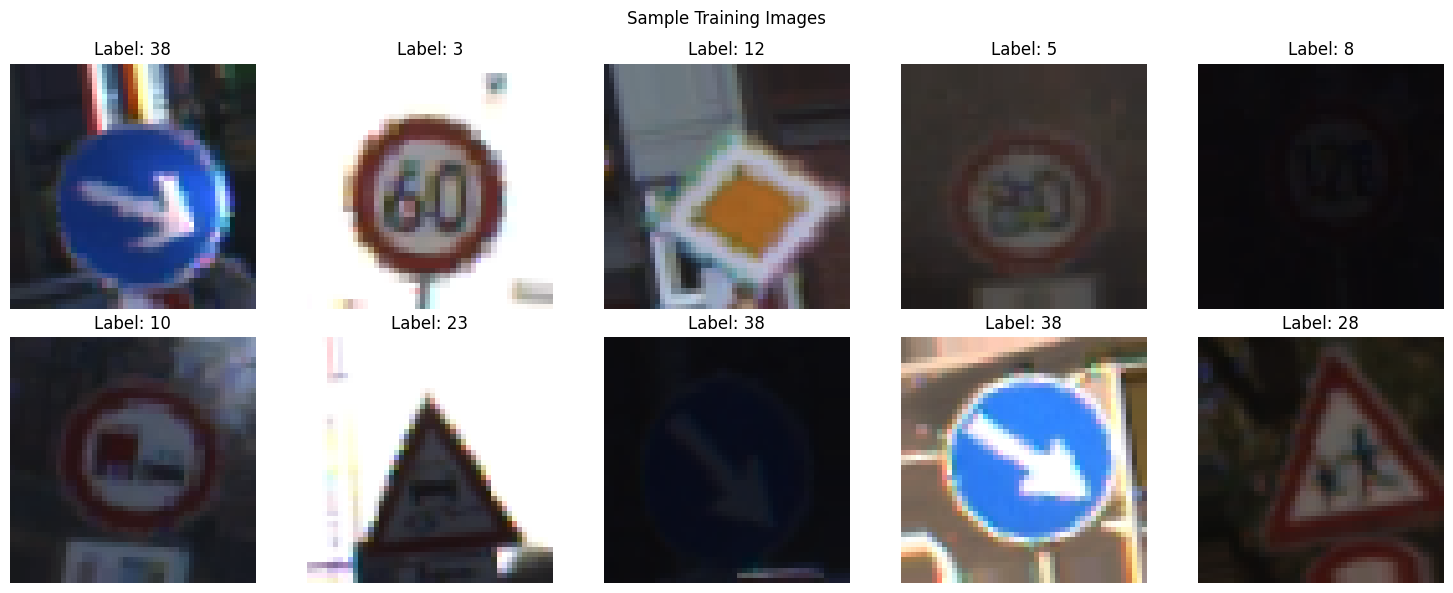

In [22]:
# Get one batch of training images and labels
images, labels = next(train_generator)

# Plot the first 10 images from the batch
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    label_name = list(train_generator.class_indices.keys())[label_index]
    plt.title(f"Label: {label_name}")
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.tight_layout()
plt.show()

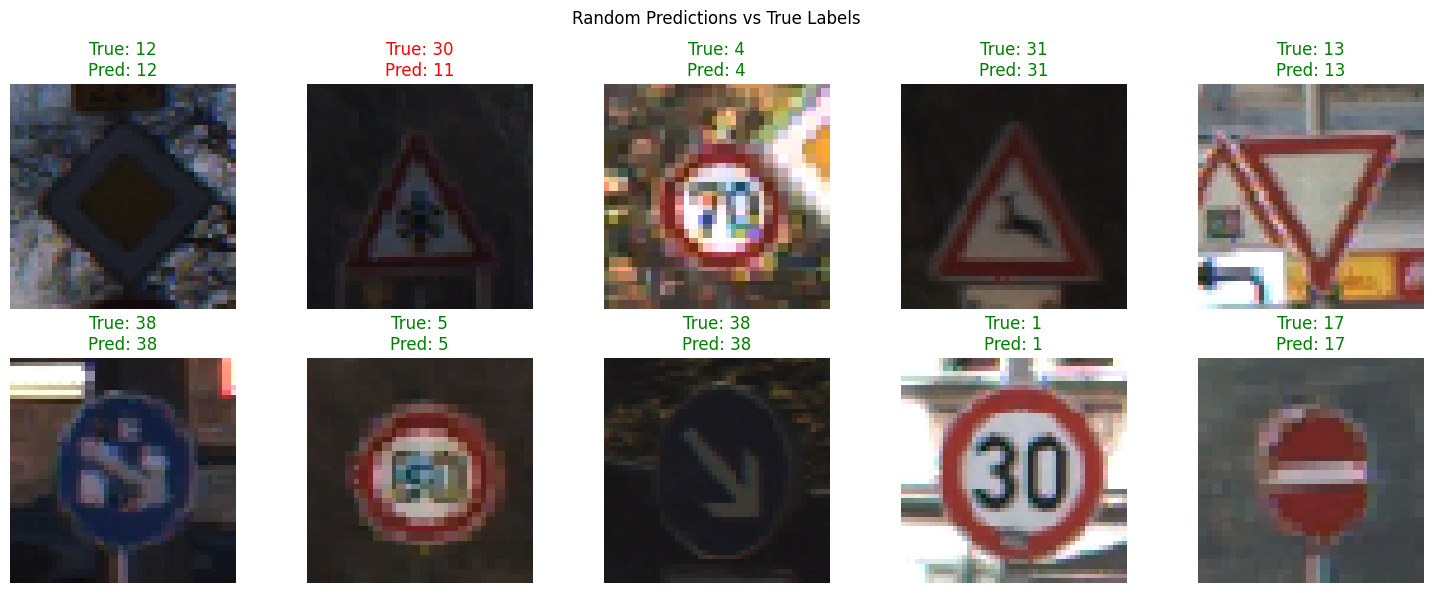

In [23]:
# Plot first 10 test images with their labels
import random

# Select 10 random indices
random_indices = random.sample(range(len(X_test)), 10)

# Plotting
plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred_labels[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {pred_label}", color='green' if true_label == pred_label else 'red')
    plt.axis('off')

plt.suptitle("Random Predictions vs True Labels")
plt.tight_layout()
plt.show()


In [ ]:
print(np.unique(y_test))  # Are labels in [0–42] and matching training classes?
print(class_indices)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}


In [24]:
# Save test data for Streamlit evaluation
import numpy as np
import pickle

# Save X_test and y_test for evaluation in Streamlit
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
print("✅ Saved X_test.npy and y_test.npy")

# Save training history for plotting accuracy/loss in Streamlit
with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)
print("✅ Saved history.pkl")


✅ Saved X_test.npy and y_test.npy
✅ Saved history.pkl
